<a href="https://colab.research.google.com/github/luongdo94/Data-Sciences/blob/main/Dating%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv("/content/drive/MyDrive/Online_Dating_Behavior_Dataset.csv")

In [98]:
df.head(3)

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   PurchasedVIP    1000 non-null   int64
 2   Income          1000 non-null   int64
 3   Children        1000 non-null   int64
 4   Age             1000 non-null   int64
 5   Attractiveness  1000 non-null   int64
 6   Matches         1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [100]:
df.isnull().sum()

Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64

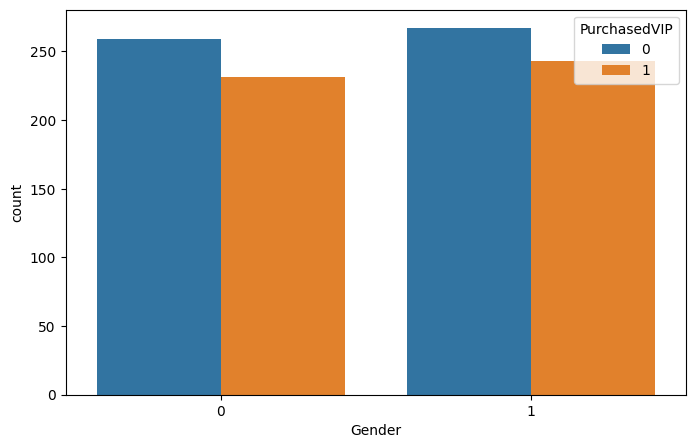

In [110]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Gender", hue="PurchasedVIP")
plt.show()


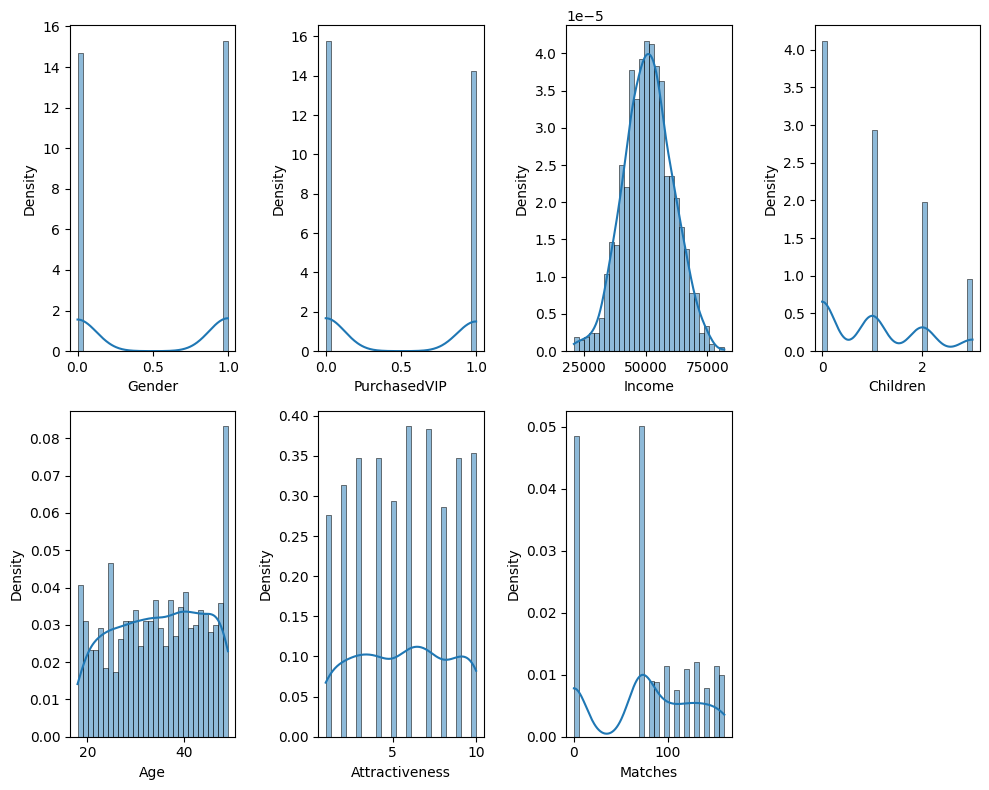

In [ ]:
num_cols_eda = df.columns

fig, ax = plt.subplots(2, 4, figsize=(10, 8))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    sns.histplot(df[col],kde=True,stat='density',bins=30,ax=ax[i])

for i in range(len(num_cols_eda),8):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

Features engineering

<Axes: >

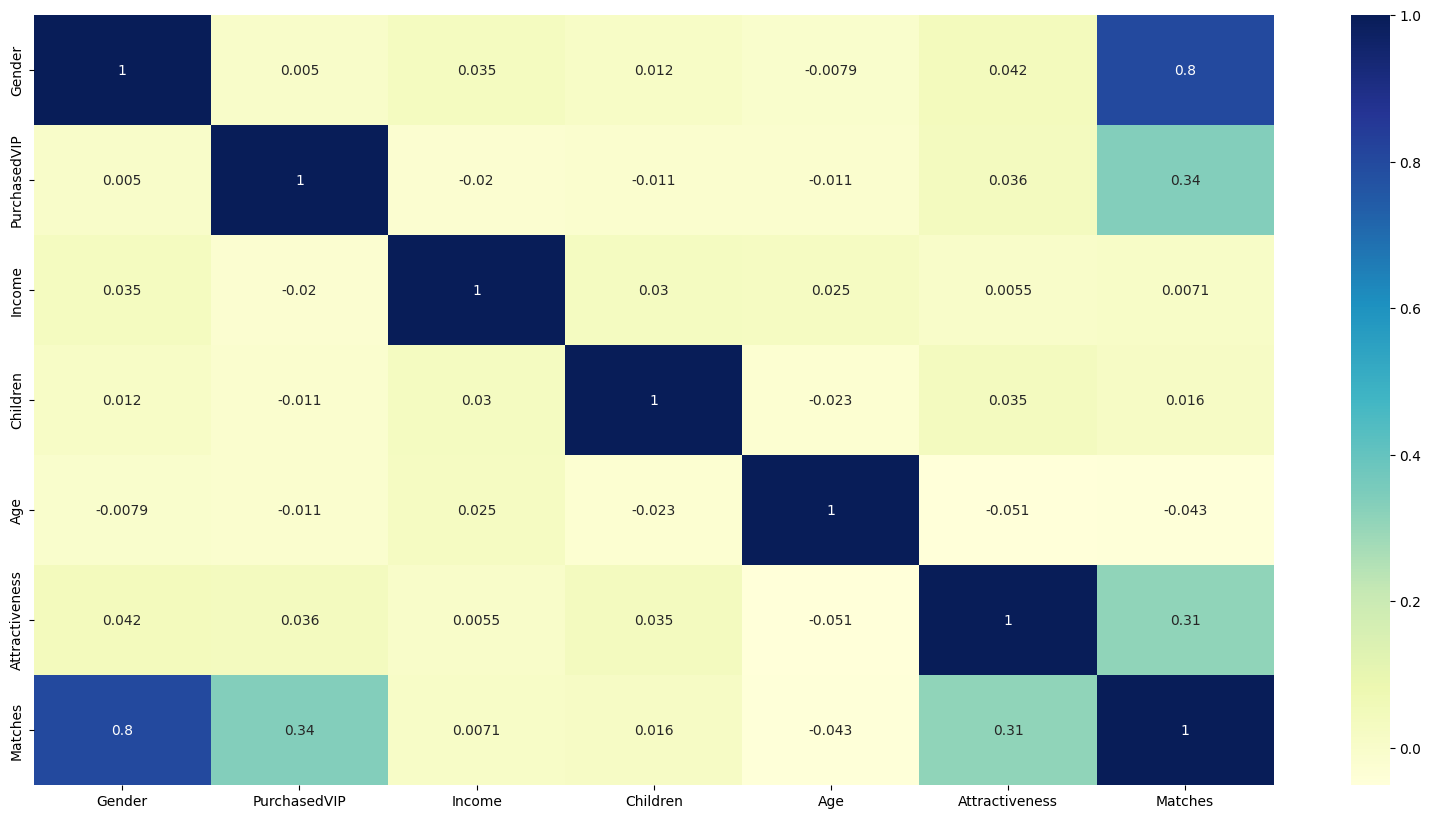

In [ ]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linecolor='black')

In [112]:
features=['Gender', 'PurchasedVIP', 'Income', 'Age', 'Attractiveness', 'Children']
X=df[features]
y=df["Matches"]

In [113]:
X

,Gender,PurchasedVIP,Income,Age,Attractiveness,Children
0,0,1,51777,47,5,3
1,1,0,36646,42,7,0
2,0,0,53801,25,5,1
3,0,0,56105,35,8,0
4,0,0,55597,36,6,1
...,...,...,...,...,...,...
995,0,0,36799,28,1,0
996,0,1,43882,46,9,2
997,1,0,49629,49,6,2
998,1,0,45706,22,8,1


split the dataset into trainset and testset

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
y_test.shape, y_train.shape

((200,), (800,))

standardize the features


In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[features] = sc.fit_transform(X_train[features])
X_test[features] = sc.fit_transform(X_test[features])
X_train


,Gender,PurchasedVIP,Income,Age,Attractiveness,Children
382,0.985111,-0.904534,-1.505100,-1.625396,0.855437,1.050834
994,0.985111,-0.904534,-0.854275,0.575919,-0.911083,0.036760
982,0.985111,1.105542,-0.031666,0.465853,0.855437,0.036760
47,-1.015114,-0.904534,-0.633411,1.126248,0.148829,0.036760
521,-1.015114,-0.904534,0.890211,0.465853,0.148829,-0.977313
...,...,...,...,...,...,...
767,0.985111,-0.904534,0.195937,-0.194541,-1.264387,-0.977313
72,-1.015114,1.105542,-0.748570,-1.075067,-1.264387,0.036760
908,-1.015114,1.105542,0.177330,-1.625396,-1.264387,-0.977313
235,0.985111,1.105542,0.091539,1.236313,0.502133,-0.977313


In [120]:
#Build the decisiontree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  classification_report, accuracy_score
dt_model= DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train, y_train)
y_pred_dt=dt_model.predict(X_test)
acc_dt=accuracy_score(y_test, y_pred_dt)
acc_dt
#print(classification_report(y_test, y_pred_dt))

1.0

In [121]:
#build logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_lr=log_reg.predict(X_test)
acc_lr=accuracy_score(y_test, y_pred_lr)
acc_lr
#print(classification_report(y_test, y_pred_lr))


0.795

In [125]:
#cross vadidation
from sklearn.model_selection import cross_val_score
log_reg_cv = LogisticRegression(max_iter=10000)
dt_cv=DecisionTreeRegressor(max_depth=5, random_state=1)
lr_score=cross_val_score(log_reg_cv, X, y, scoring="accuracy", cv=5)
dt_score=cross_val_score(dt_cv, X, y, scoring="accuracy", cv=5)

In [126]:
lr_score.mean(), lr_score.std()

(0.327, 0.06313477647065838)

In [127]:
dt_score.mean(), dt_score.std()

(1.0, 0.0)